In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("counts.csv")
df = df.drop(columns=[col for col in df.columns if col.startswith('Unnamed:')]) # If th
print(df.shape)

(909, 325)


In [3]:
df = df.fillna(-1)

In [4]:
df.sum(axis=0)

2023-10   -795.0
2023-09   -826.0
2023-08   -834.0
2023-07   -842.0
2023-06   -839.0
           ...  
1997-02   -909.0
1997-01   -909.0
1996-12   -909.0
1996-11   -909.0
1996-10   -909.0
Length: 325, dtype: float64

In [5]:
from tqdm import tqdm
# Iterate over rows with tqdm for progress bar
appearance_counts = [0] * df.shape[1]
for row in tqdm(range(df.shape[0])):
    last_value = 0
    seen_value = False
    # Iterate over columns in reverse order
    for col in reversed(range(df.shape[1])):
        # Ensure the value is an integer before checking
        value = df.iloc[row, col]
        if isinstance(value, float) and value >= 0:
            last_value = value
            seen_value = True
        # Replace current value with max_value
        df.iloc[row, col] = last_value
        if seen_value:
            appearance_counts[col] += 1

100%|██████████| 909/909 [00:15<00:00, 57.11it/s]


In [6]:
print(appearance_counts)

[82, 81, 81, 81, 81, 81, 80, 80, 78, 78, 78, 77, 76, 76, 76, 75, 75, 75, 75, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 73, 73, 73, 72, 72, 72, 72, 71, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 68, 68, 68, 67, 67, 67, 67, 67, 67, 67, 67, 67, 66, 65, 65, 64, 63, 63, 61, 61, 61, 61, 61, 61, 61, 61, 60, 60, 60, 59, 59, 58, 58, 58, 58, 58, 58, 58, 57, 57, 56, 56, 56, 56, 56, 55, 55, 55, 54, 52, 51, 51, 51, 51, 51, 51, 50, 50, 50, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 45, 45, 44, 44, 44, 44, 44, 44, 44, 43, 41, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 31, 31, 31, 30, 30, 29, 29, 29, 29, 29, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 25, 25, 25, 25, 25, 25, 25, 24, 24, 23, 23, 23, 23, 23, 22, 22, 22, 20, 20, 20, 20, 20, 20, 20, 20,

In [10]:
sum_list = list(df.sum(axis=0, numeric_only=True))

In [12]:
print([(x/y if y > 0 else 0) for (x, y) in zip(sum_list, appearance_counts)])

[0.7317073170731707, 0.6296296296296297, 0.5802469135802469, 0.5308641975308642, 0.5308641975308642, 0.5679012345679012, 0.575, 0.575, 0.5897435897435898, 0.5897435897435898, 0.5769230769230769, 0.5714285714285714, 0.5789473684210527, 0.5789473684210527, 0.5789473684210527, 0.5866666666666667, 0.5866666666666667, 0.5866666666666667, 0.5866666666666667, 0.5945945945945946, 0.5945945945945946, 0.5945945945945946, 0.5945945945945946, 0.5945945945945946, 0.5945945945945946, 0.5945945945945946, 0.5945945945945946, 0.5945945945945946, 0.5945945945945946, 0.44594594594594594, 0.44594594594594594, 0.4383561643835616, 0.4383561643835616, 0.4383561643835616, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4084507042253521, 0.4142857142857143, 0.4142857142857143, 0.4142857142857143, 0.4142857142857143, 0.4142857142857143, 0.4142857142857143, 0.4142857142857143, 0.4142857142857143, 0.38571428571428573, 0.38571428571428573, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0

In [ ]:
ratios = [(x/y if y > 0 else 0) for (x, y) in zip(sum_list, appearance_counts)]

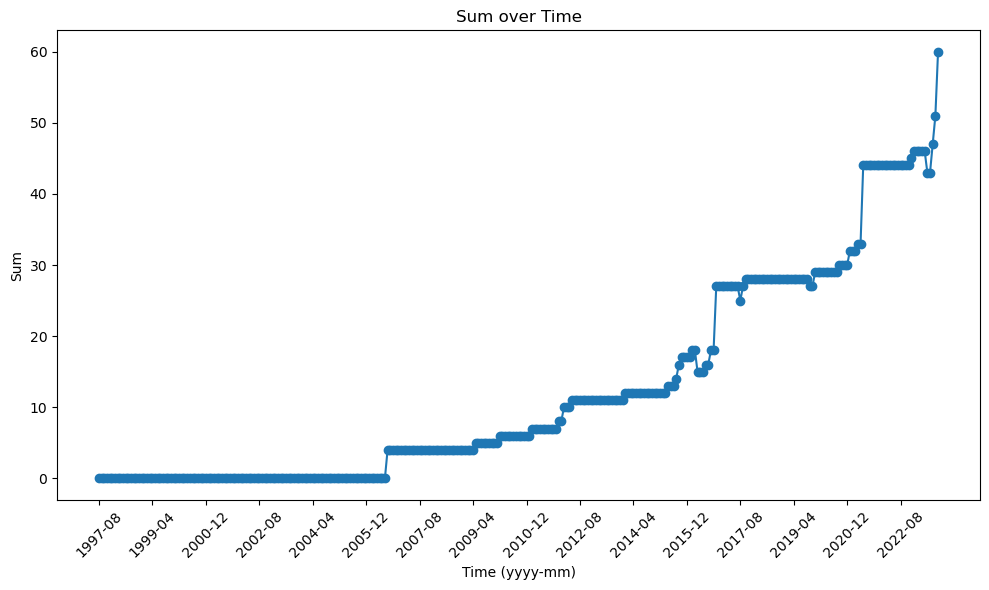

In [14]:
# sum = list(df.sum(axis=0, numeric_only=True))[:]
times = list(df.columns)[:]

sum_list.reverse()
times.reverse()

sum = ratios[10:]
times = times[10:]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(times, sum, marker='o')

# Adding labels and title
plt.xlabel('Time (yyyy-mm)')
plt.ylabel('Sum')
plt.title('Sum over Time')

# Rotating the x-axis labels for better readability
step = 20
plt.xticks(ticks=range(0, len(times), step), labels=times[::step], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()